In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

%matplotlib inline

Consider the equation: 
$$y = 2x^2 + 5x + 2 $$

We define the function and its derivative below.

In [15]:
def tangent_line(m, x0, y0, length = 1):
#  Helper function for drawning tangent linesdef tangent_line(m, x0, y0, length = 1):
    x = np.linspace(x0 - length / 2, x0 + length / 2)
    y = m * (x - x0) + y0
    return x, y

#  Our function of interest, a quadratic equation
def quadratic(x):
    return 2 * np.power(x, 2) + 5*x + 2

#  Our function's derivative
def derivative(x, args = []):
    return 4 * x + 5

Slope at x =  4  is  21


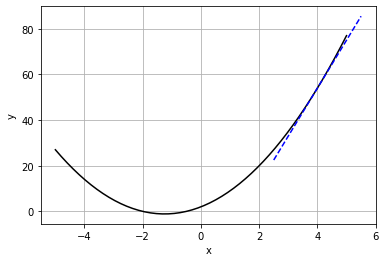

In [16]:
#  Plot the quadratic
x = np.linspace(-5, 5)
plt.plot(x, quadratic(x), 'k')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim( [-5.5, 6] )

#  Plot the tangent line at our initial guess
x0 = 4
slope = derivative(x0)
print('Slope at x = ', x0, ' is ', slope)
X, Y = tangent_line(slope, x0, quadratic(x0), length = 3)

plt.plot(X, Y, 'b--')

###  Update Rule
To reiterate, we are walking downhill (the direction of the negative of the derivative (or gradient in multidimensional case).  The equation for updating our guess of the minimum is given by,
$$a_{n+1} = a_n - \gamma \nabla F(a_n)$$

The constant $\gamma$ Is a scaling fctor which allows some control over the size of the step taken.


In [17]:
#  Our gradient descent implementation.  For the time being, there is no cutoff criteria other than reaching max count
#  fprime is the function which returns the derivative or gradient
# x0 is out initial guess for the minimum
def gradient_descent(fprime, x0, args = None, gamma = 1e-3, max_iter = 1e5):
    count = 0
    
    while count <= max_iter:
        count = count + 1
        x0 = x0 - gamma * fprime(x0, args)
        
    return x0, count
    

In [18]:
#  Call the function and print the results.  Actual min is at -1.25
x0, count = gradient_descent(derivative, 4)
print(x0)

-1.2499999999999725
